# Decision Trees Classifier - Example 1 (Data Train)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../Auditorium-Exercises/data/data_train.csv')

In [2]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data,outcome
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0,died
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0,euthanized
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0,lived
3,3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1,lived
4,4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1,lived


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   nasogastric_reflux_ph  1235 non-null   float64
 9   packed_cell_volume     1235 non-null   float64
 10  total_protein          1235 non-null   float64
 11  abdomo_protein         1235 non-null   float64
 12  surgical_lesion        1235 non-null   int64  
 13  lesion_1               1235 non-null   int64  
 14  cp_data                1235 non-null   int64  
 15  outc

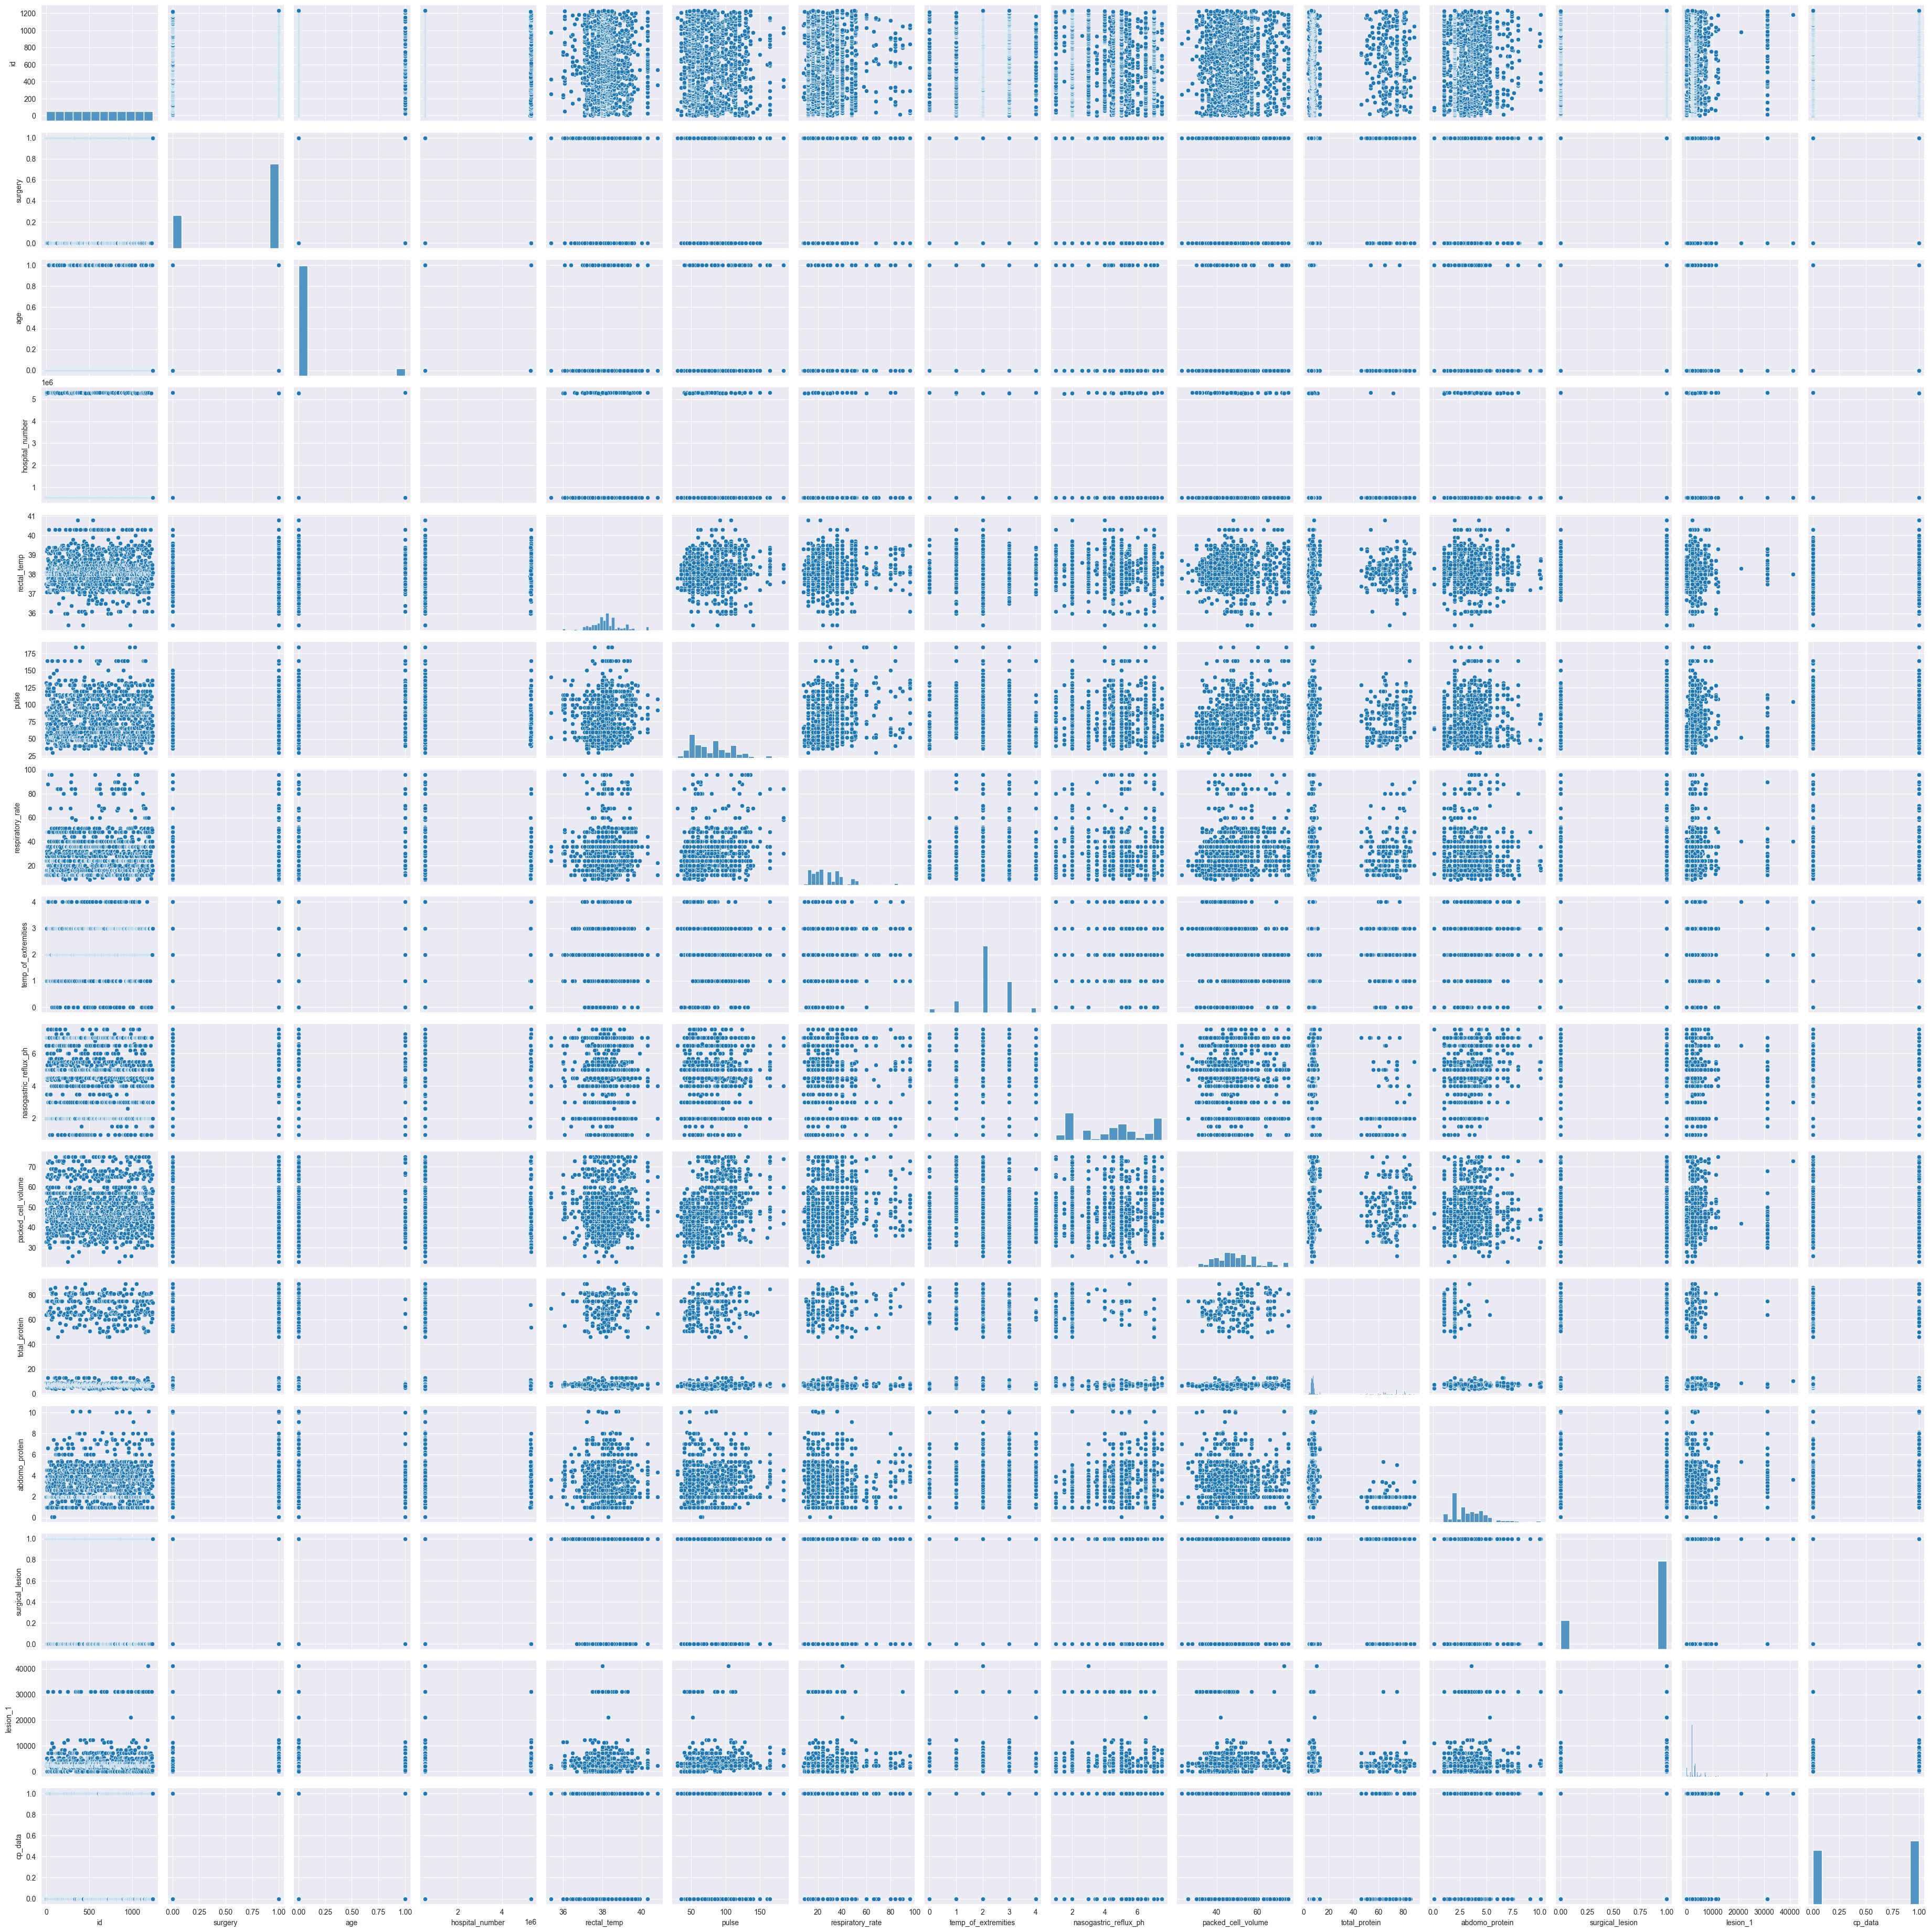

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(df)
plt.show()

In [6]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [7]:
X = df.drop(['id', 'outcome'], axis=1)
Y = df['outcome']


<Axes: >

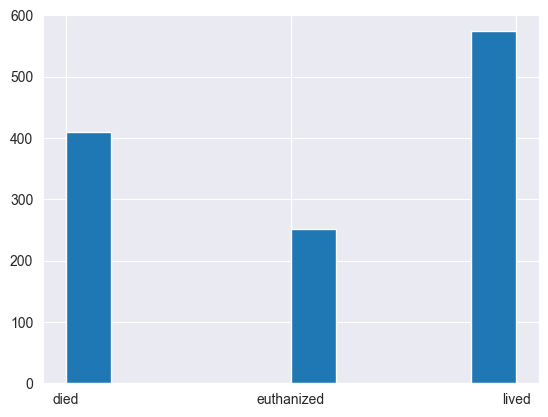

In [9]:
Y.hist()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [19]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [4, 8, 12],
}

In [20]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=rkf)
cv.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [4, 8, 12]})

In [21]:
cv.best_score_

0.6004858299595142

In [22]:
model = cv.best_estimator_

In [23]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7975708502024291

# Decision Trees Classifier - Example 2 (Bill Authentication)

In [24]:
df = pd.read_csv('../Auditorium-Exercises/data/bill_authentication.csv')

In [25]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


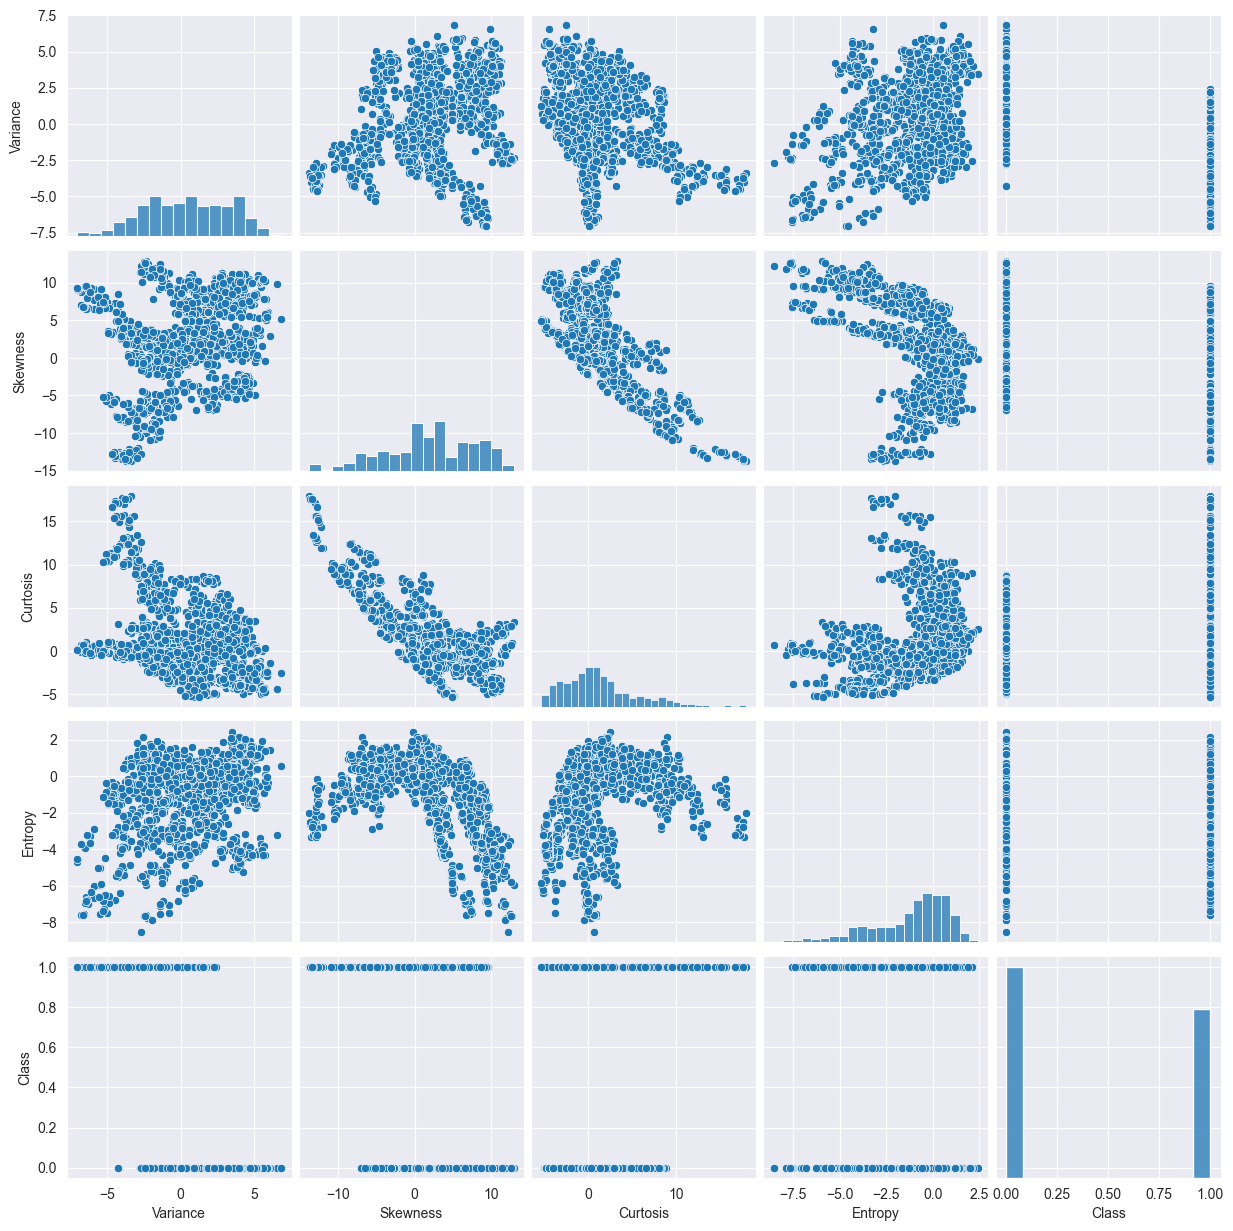

In [27]:
sns.pairplot(df)

In [28]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [31]:
accuracy_score(Y_test, Y_pred)

0.9927272727272727

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [38]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Decision Trees Regressor - Example 3 (50 Startups)

In [42]:
df = pd.read_csv('../Auditorium-Exercises/data/50_Startups.csv')

In [43]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [45]:
df = df.drop(['State', 'Administration'], axis=1)

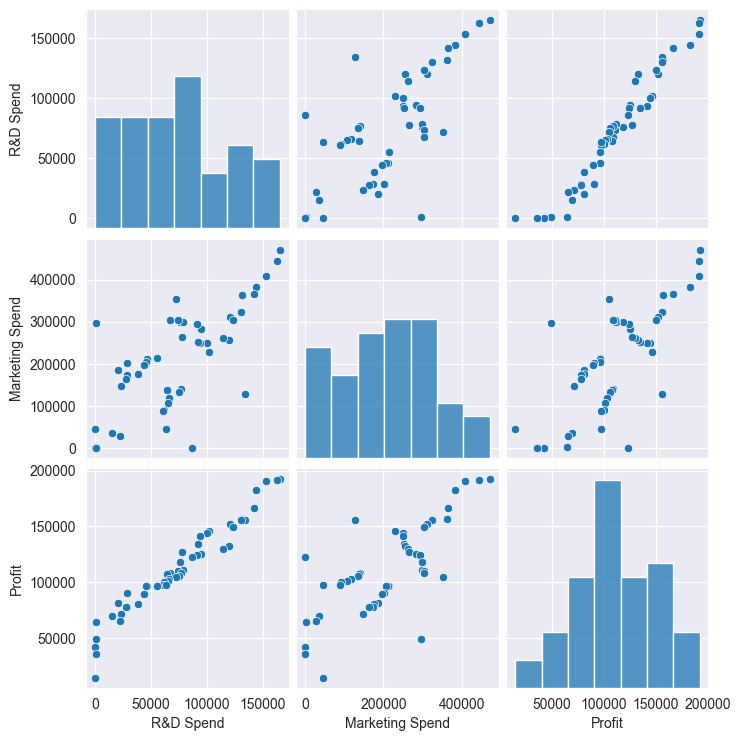

In [46]:
sns.pairplot(df)
plt.show()

In [52]:
X = df.drop(['Profit'], axis=1)
Y = df['Profit']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [54]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()

reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [55]:
reg.score(X_test, Y_test)

0.9612107009064994